In [1]:
import numpy as np
import scipy
import scipy.stats as sps
import matplotlib.pyplot as plt
from matplotlib.figure import Figure

%matplotlib inline

In [2]:
#-- 2 задание ----
def cumavg(X):
    return scipy.cumsum(X) / np.arange(1, len(X) + 1, 1)

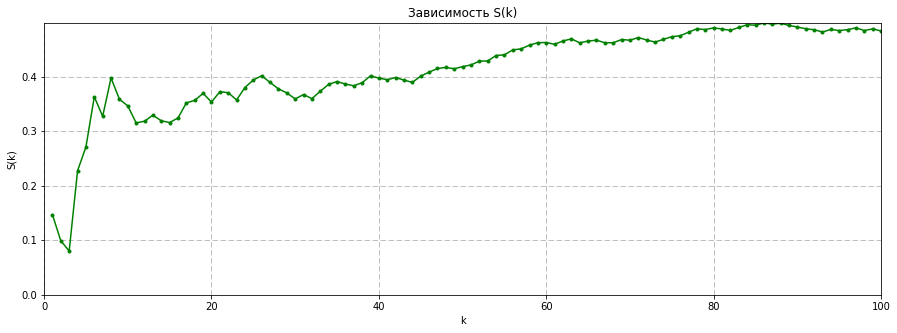

In [3]:
S = cumavg(sps.uniform.rvs(size=100))
X = np.arange(1, len(S) + 1, 1)

plt.figure(figsize = (15,5))
line = plt.plot(X, S, "g.-")

plt.axis([0, 100, 0, S.max()])
plt.title(u'Зависимость S(k)')
plt.xlabel(u'k')
plt.ylabel(u'S(k)')
plt.grid(linestyle='dashed')

In [4]:
def stupid_cumavg(X):
    S = [0 for i in range(len(X))]
    for i in range(len(X)):
        S[i] = X[i] + S[i - 1]
    for i in range(len(X)):
        S[i] /= i + 1
    return S

X = sps.uniform.rvs(size=10 ** 7)

%time S1 = cumavg(X)
%time S2 = stupid_cumavg(X)
print(np.abs(S1 - S2).sum())

CPU times: user 80 ms, sys: 8 ms, total: 88 ms
Wall time: 87.4 ms
CPU times: user 5.95 s, sys: 96 ms, total: 6.05 s
Wall time: 6.05 s
0.0


In [5]:
#-- 3 задание ----
def avgmin(X):
    return (X.min(axis=0)).mean()

In [6]:
def stupid_avgmin(A):
    N, M = len(A), len(A[0])
    min_col = [min([A[i][j] for i in range(N)]) for j in range(M)]
    return sum(min_col) / M

N, M = 5000, 10000
A = sps.uniform.rvs(size=(N, M))

%time S1 = avgmin(A)
%time S2 = stupid_avgmin(A)
print(np.abs(S1 - S2))

CPU times: user 52 ms, sys: 0 ns, total: 52 ms
Wall time: 54.1 ms
CPU times: user 14.8 s, sys: 24 ms, total: 14.8 s
Wall time: 14.8 s
1.08420217249e-19


In [7]:
#-- 4 задание ----
def func4(X, v=0):
    res = X.copy()
    res[X % 2 == 0] = v
    res[X % 2 == 1] = X[::-1][X[::-1] % 2 == 1]**2
    return res

In [8]:
def stupid_func4(X, v=0):
    odd = [elem ** 2 for elem in X if elem % 2]
    
    new_X = []
    j = len(odd) - 1
    for i in range(len(X)):
        if X[i] % 2:
            new_X.append(odd[j])
            j -= 1
        else:
            new_X.append(v)
    
    return new_X

X = sps.randint.rvs(size=10 ** 7, low=0, high=100)

%time A1 = func4(X)
%time A2 = stupid_func4(X)

print(np.abs(A1 - A2).sum())

CPU times: user 624 ms, sys: 32 ms, total: 656 ms
Wall time: 655 ms
CPU times: user 7.59 s, sys: 40 ms, total: 7.63 s
Wall time: 7.63 s
0


NumPy работает быстро, так эта библиотека написана с использованием языка С